![กระทรวงแรงงาน](https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/logo_laber.jpg "กระทรวงแรงงาน")

แหล่งข้อมูลที่มา : https://ldls.mol.go.th/main

 Import module                 |   Description                          
-------------------------------|-------------------------------------
 import `re`                   |   ใช้ในการ search หา str ใน text  
 import `requests`             |   ใช้ในการส่งคำขอเพื่อสามารถใช้ link URL ได้  
 import `numpy`                |   ใช้ในการจัดรูปแบบกราฟวิเคราะห์ข้อมูล        
 import `pandas`               |   ใช้ในการจัดการข้อมูลที่เป็น dataframe       
 import `seaborn`              |   ใช้ในการทำรูปแบบกราฟต่าง ๆ ของข้อมูล      
 import `matplotlib.pyplot`    |   ใช้ในการคำนวณและ plot กราฟ            

In [1]:
import sys
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import matplotlib

In [2]:
print(f'python version = {sys.version}')
print(f're version = {re.__version__}')
print(f'requests version = {requests.__version__}')
print(f'numpy version = {np.__version__}')
print(f'pandas version = {pd.__version__}')
print(f'seaborn version = {sns.__version__}')
print(f'matplotlib version = {matplotlib.__version__}')
print(f'last run = {date.today()}')

python version = 3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]
re version = 2.2.1
requests version = 2.28.1
numpy version = 1.21.5
pandas version = 1.5.2
seaborn version = 0.12.2
matplotlib version = 3.6.2
last run = 2023-01-27


# Read CSV file
อ่านไฟล์ CSV ทั้งหมด 5 ไฟล์ ประกอบด้วยข้อมูลสาขาวิชาของป.ตรี ปี 2563, 2564, 2565, 2566 และข้อมูลที่รวมทั้ง 4 ปีเข้าด้วยกัน

In [3]:
url = 'https://api.github.com/repos/Comrade26/Interesting_data_project/contents/team7_assgn1/data/'
response = requests.get(url)
list_data_name = []
list_data = []

if response.status_code == 200:
    files = response.json()
    for file in files:
        list_data_name.append(file['name'][:-4])
        list_data.append(pd.read_csv(file['download_url']))
        # data ปี 2563 เป็น index ที่ 0 ใน list_data_name ซึ่งจะเท่ากับ list_data index ที่ 0 ซึ่งเป็น dataframe และจะสามารถรู้ข้อมูลที่อยู่ในปี 2563
else:
    print(response.json()['message'])

In [4]:
list_data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   สาขาวิชา             337 non-null    object
 1   ชาย                  337 non-null    int64 
 2   หญิง                 337 non-null    int64 
 3   ไม่ระบุเพศ           337 non-null    int64 
 4   แรงงานไทย            337 non-null    int64 
 5   แรงงานต่างด้าว       337 non-null    int64 
 6   แรงงานที่ต้องการรวม  337 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.6+ KB


In [5]:
list_data[1]

,สาขาวิชา,ชาย,หญิง,ไม่ระบุเพศ,แรงงานไทย,แรงงานต่างด้าว,แรงงานที่ต้องการรวม
0,ทุกสาขา,67,15,41,123,0,123
1,การตลาด,25,28,68,121,0,121
2,ทางวิศวกรรมไฟฟ้ากำลัง,45,15,0,60,0,60
3,ช่างยนต์,57,1,1,59,0,59
4,บัญชี,1,30,24,55,0,55
...,...,...,...,...,...,...,...
332,ป.ตรีเศรษฐศาสตร์การเงินและการตลาด,0,0,1,1,0,1
333,คอมพิวเตอร์กราฟฟิก,0,0,1,1,0,1
334,-อุตสาหกรรม-เทคโนโลยีการผลิต-เครื่องกล,1,0,0,1,0,1
335,ป.ตรีการสอนธุรกิจศิลป์ (บริหารธุรกิจ),1,0,0,1,0,1


# List data importantly
การ clean data ขั้นที่ 1
1. เปลี่ยนชื่อคอลัมน์จากภาษาไทยเป็นภาษาอังกฤษ ทำเพื่อให้เวลา plot กราฟ ไม่ต้องมีการกำหนด font
2. ลบตัวอักษรบางตัวที่อาจก่อให้เกิด Erro code เช่น "-" 

In [6]:
dict_for_change = {"สาขาวิชา": "Major",	"ชาย": "Male", "หญิง": "Female", "ไม่ระบุเพศ" : "Unknow_Gender", "แรงงานไทย": "Thai", "แรงงานต่างด้าว": "Non_Thai", "แรงงานที่ต้องการรวม": "Total_Work_Demand"}

letter_box = ["-", "(", ")", "[", "]"]
for c in list_data:
    for n in range(len(dict_for_change)):
        c.columns = c.columns.str.replace(list(dict_for_change.keys())[n],list(dict_for_change.values())[n]) 
    for i in range(len(c.Major)):
        for letter in letter_box:
            c.loc[i, "Major"] = c.loc[i, "Major"].replace(letter, " ")



# Clean Data
การ clean data ขั้นที่ 2
<br>
การ clean data ขั้นนี้ทำเพื่อลบข้อมูลที่อาจจะผิดออกจาก data ของข้อมูลเดิม

In [7]:
all_name = []
not_want_word = ["ปวส", "ปวช", "ป.โท", "ช่าง", "สำนักงานใหญ๋", "วิชาชีพ", "ผู้ควบคุม", "ทั่วไป", "อาชีว", "ก่อสร้าง", "เชื่อมโลหะ", "เทคนิค", "แม่พิมพ์โลหะ", "ที่เกี่ยวข้อง", "ฝ่ายผลิต", "การผลิต", "ความปลอดภัย", "ช่่างยนต์", "สำนักงานใหญ่"]

list_cleaned_data = []
for c in list_data:
    cleaned_data = c.copy()
    for i in range(len(c)):
        match_not_wanted = re.search("|".join(not_want_word), c.Major[i])
        if match_not_wanted is not None:
            cleaned_data = cleaned_data.drop(i)
        else:
            all_name.append(c.Major[i])
    cleaned_data = cleaned_data.dropna().reset_index(drop= True)
    list_cleaned_data.append(cleaned_data)

# Category of data
การแยกประเภท data เพื่อใช้ในการ clean data ในลำดับถัดไป

In [8]:
data_category = {
'need_all': ["ทุกสาขา", "ไม่จำกัด", "ไม่กำหนด", "ไม่เน้น", "ปริญญาตรี", "สาขาใดก็ได้"],
'Management': ["yp=u","Finance" , "บันชี", "ตลาด", "การเงิน", "บัญชี", "บริหาร", "โลจิสติกส์", "การขาย", "ทรัพยากรมนุษย์", "เศรษฐศาสตร์", "การจัดการ", "logistic", "business", "accounting", "commerce", "พาณิช", "งานบุคคล", "การบันชี", "ธุรการ",],
'Engineer': ["วิศว", "engineer", "ไฟฟ้า", "เครื่องกล", "อุตสาหกรรม", "electrical", "อีเล็กทรอนิค", "อิเล็กทรอนิกส์","อิเล็กทรอนิค","อีเล็คทรอนิก", "ยานยนต์", "วิสว", "ไฟฟา", "อุตสาหการ", "โยธา", "rubber", "เครื่องจักร"],
'Science' : ["โพลิเมอร์", "วิทยาศาสตร์", "เทคโนโลยีอาหาร", "สาธาณะสุข", "วิทยาศาสรต์", "อาหารและโภชนาการ", "สังคมสิ่งแวดล้อม", "เกษตร", "เกษคร", "ประมง", "คณิตศาสตร์", "การประกันภัย", "เทคโนโลยีการบรรจุ", "data science", "เกษตรกรรม", "คหกรรมศาสตร์"],
'Computer' : ["computer", "it", "คอมพิวเตอร์", "สาร์นสนเทศน์", "programmer", "คอมฟิวเตอร์", "เทคโนโลยีสารสนเทศ"],
'Medicine' : ["เฉพาะทางด้านไตเทียม", "เภสัช", "แพทย์", "พยาบาล", "การดูแลเด็กและผู้สูงอายุ", "สัตวแพทย์", "สัตวแพทย", "รังสีเทคนิค", "ทันตแพทย", "กายภาพบำบัด", "สาธารณสุข", "สัตวศาสตร์"],
'Education' : ["มัธยมศึกษา", "ประถมศึกษา", "พัฒนาหลักสูตร", "ครุศาสตร์", "การสอน", "การศึกษา", "วิจัย", "การศึกษานอกระบบ", "เลขานุการ", "สื่อสารการศึกษา", "ศึกษาศาสตร์", "ปฐมวัย"],
'Arts' : ["ศิลปกรรม", "กราฟฟิกส์ดีไซด์", "ออกแบบ", "ศิลป", "กราฟฟิคดีไซน์", "design"],
'Architecture' : ["สถาปัต", "เขียนแบบ"],
'Literature' : ["ญี่ปุ่น", "ภาษาอังกฤษ", "การสื่อสาร", "ภาษาต่างประเทศ", "อักษรศาสตร์"],
'Humanities' : ["มนุษยศาสตร์", "มานุษยวิทยา", "มานุษยสงเคราะห์"],
'Laws' : ["นิติ", "เลขานุการ", "กฎหมาย", "รัฐศาสตร์", "laws"],
'Communication Arts' : ["ประชาสัมพันธ์", "นิเทศ", "สื่อสารมวลชน"],
'Music' : ["ดุริยาง", "ดนตรี"],
'Hospitality and Tourism' : ["การโรงแรม", "การบริการ", "สาขาท่องเที่ยว"],
}


# Group and Change lang Data
การ clean data ขั้นที่ 3 เป็นการเปลี่ยนข้อมูลใน dataframe ให้แยกตามหมวดหมู่ตามที่เราเคยแยกหมวดหมู่ไว้ก่อนหน้านี้

In [9]:
for k in list_cleaned_data:
    for num in range(len(k.Major)):
        for i in range(len(data_category)):
            match = re.search("|".join(list(data_category.values())[i]), k.Major[num].lower())
            if match is not None:
                k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = list(data_category.keys())[i]
            # match_need_all = re.search("|".join(need_all), k.Major[num].lower())
            # match_บริหาร = re.search("|".join(บริหาร), k.Major[num].lower())
            # match_วิศวกรรม = re.search("|".join(วิศวกรรม), k.Major[num].lower())
            # match_วิทยาศาสตร์ = re.search("|".join(วิทยาศาสตร์), k.Major[num].lower())
            # match_เทคโนโลยีสารสนเทศ = re.search("|".join(เทคโนโลยีสารสนเทศ), k.Major[num].lower())
            # match_แพทย์ศาสตร์ = re.search("|".join(แพทย์ศาสตร์), k.Major[num].lower())
            # match_ครุศาสตร์ = re.search("|".join(ครุศาสตร์), k.Major[num].lower())
            # match_ศิลปศาสตร์ = re.search("|".join(ศิลปศาสตร์), k.Major[num].lower())
            # match_สถาปัตยกรรมศาสตร์ = re.search("|".join(สถาปัตยกรรมศาสตร์), k.Major[num].lower())
            # match_อักษรศาสตร์ = re.search("|".join(อักษรศาสตร์), k.Major[num].lower())
            # match_มนุษยศาสตร์ = re.search("|".join(มนุษยศาสตร์), k.Major[num].lower())
            # match_นิติศาสตร์ = re.search("|".join(นิติศาสตร์), k.Major[num].lower())
            # match_คณะนิเทศศาสตร์ = re.search("|".join(คณะนิเทศศาสตร์), k.Major[num].lower())
            # match_ดุริยางคศาสตร์ = re.search("|".join(ดุริยางคศาสตร์), k.Major[num].lower())
            # match_การบริการและการท่องเที่ยว = re.search("|".join(การบริการและการท่องเที่ยว), k.Major[num].lower())
            # if match_need_all is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Any Major'
            # elif match_บริหาร is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Management'
            # elif match_วิทยาศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Science'
            # elif match_วิศวกรรม is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Engineering'
            # elif match_เทคโนโลยีสารสนเทศ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Computer'
            # elif match_แพทย์ศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Medicine'
            # elif match_ครุศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Education'
            # elif match_ศิลปศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Art'
            # elif match_สถาปัตยกรรมศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Architecture'
            # elif match_อักษรศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Literature'
            # elif match_มนุษยศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Humanities'
            # elif match_นิติศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Law'
            # elif match_คณะนิเทศศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Communication Arts'
            # elif match_ดุริยางคศาสตร์ is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Music'
            # elif match_การบริการและการท่องเที่ยว is not None:
            #     k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Tourism and Hospitality'

# Aggregate the data
การจัดรูปแบบ dataframe ให้ group by โดย Major

In [10]:
list_new_data = []
aggregation_functions = {'Male': 'sum', 'Female': 'sum', 'Unknow_Gender': 'sum', 'Thai': 'sum', 'Non_Thai': 'sum', 'Total_Work_Demand': 'sum'}

for c in list_cleaned_data:
    new_data = c.copy()
    new_data = new_data.groupby(c.Major).aggregate(aggregation_functions)
    new_data.sort_values("Thai", inplace=True, ascending=False)
    new_data.reset_index(inplace=True)
    list_new_data.append(new_data)

all_new_data = pd.concat(list_new_data, axis=0)
all_new_data = all_new_data.groupby(all_new_data.Major).aggregate(aggregation_functions)
all_new_data.sort_values("Thai", inplace=True, ascending=False)
all_new_data.reset_index(inplace=True)


# new_data_2563 = list_data.groupby(list_data.Major).aggregate(aggregation_functions)
# new_data_2564 = list_data.groupby(list_data.Major).aggregate(aggregation_functions)
# new_data_2565 = clean_data_2565.groupby(clean_data_2565.Major).aggregate(aggregation_functions)
# new_data_2566 = clean_data_2566.groupby(clean_data_2566.Major).aggregate(aggregation_functions)
# new_data_all = clean_data_all.groupby(clean_data_all.Major).aggregate(aggregation_functions)

# new_data_2563.sort_values("Thai", inplace=True, ascending=False).reset_index(inplace=True)
# new_data_2563.reset_index(inplace=True)

# new_data_2564.sort_values("Thai", inplace=True, ascending=False)
# new_data_2564.reset_index(inplace=True)

# new_data_2565.sort_values("Thai", inplace=True, ascending=False)
# new_data_2565.reset_index(inplace=True)

# new_data_2566.sort_values("Thai", inplace=True, ascending=False)
# new_data_2566.reset_index(inplace=True)

# new_data_all.sort_values("Thai", inplace=True, ascending=False)
# new_data_all.reset_index(inplace=True)

# new_list_data = [new_data_2563, new_data_2564, new_data_2565, new_data_2565, new_data_2566, new_data_all]

# Sort data
การทำ timestamp เพื่อให้ข้อมูลมารวมกันและสามารถระบุได้ว่าข้อมูลนี้เป็นของปีอะไร

In [11]:
start_year = 2563
for i, c in enumerate(list_new_data):
    c.insert(0, "Year", str(start_year + i),True)

year_with_timestamp = pd.concat(list_new_data, axis=0)
# year_only_list = [clean_data_2563, clean_data_2564, clean_data_2565]
# start_year = 2563

# for i, c in enumerate(year_only_list):
#     c.insert(0, "Year", str(start_year + i),True)

# year_with_timestamp = pd.concat(year_only_list, axis=0)

# year_with_timestamp.reset_index(inplace= True, drop=True)

# Pie Chart
เปอร์เซนต์แรงงานไทยของสาขาวิชาในปี 2565 

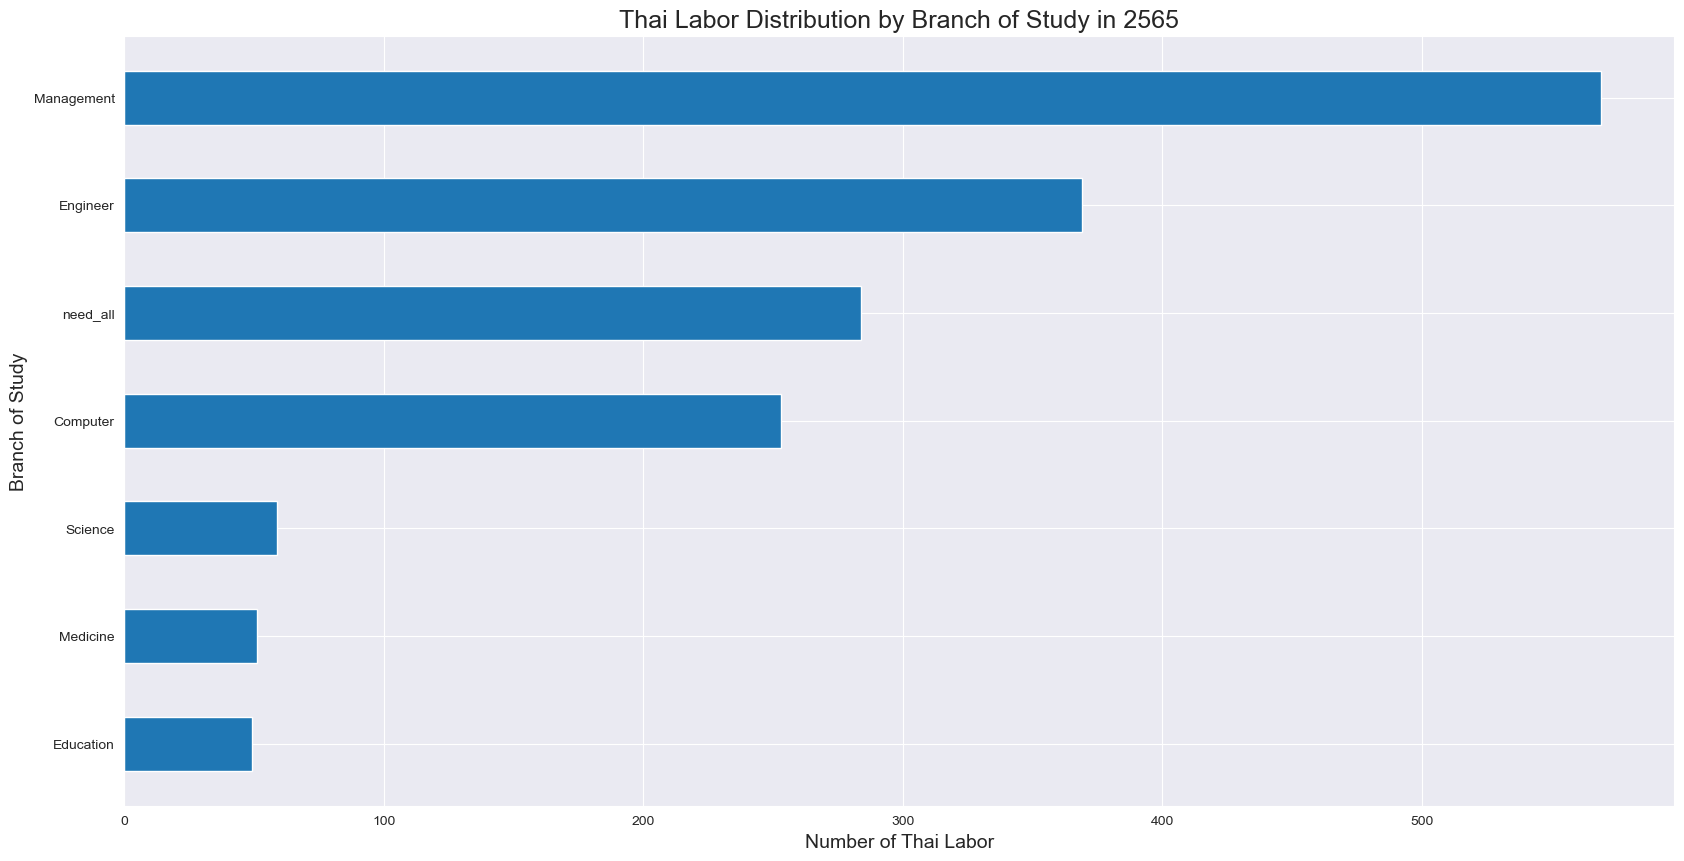

In [17]:
index_num = list_data_name.index('2565')
data = list_new_data[index_num]

data = data.sort_values(by='Thai', ascending= True)
data = data.tail(7)

plt.figure(figsize=(20, 10))
plt.barh(y=data['Major'], width=data['Thai'], height=0.5)
plt.xlabel('Number of Thai Labor', fontsize = 14)
plt.ylabel('Branch of Study', fontsize = 14)
plt.title(f'Thai Labor Distribution by Branch of Study in {list_data_name[index_num]}', fontsize = 18)
plt.show()

# Line graph
กราฟที่แสดงให้เห็นถึง demand ในการจ้างงานของวิชาสาขาต่อปี

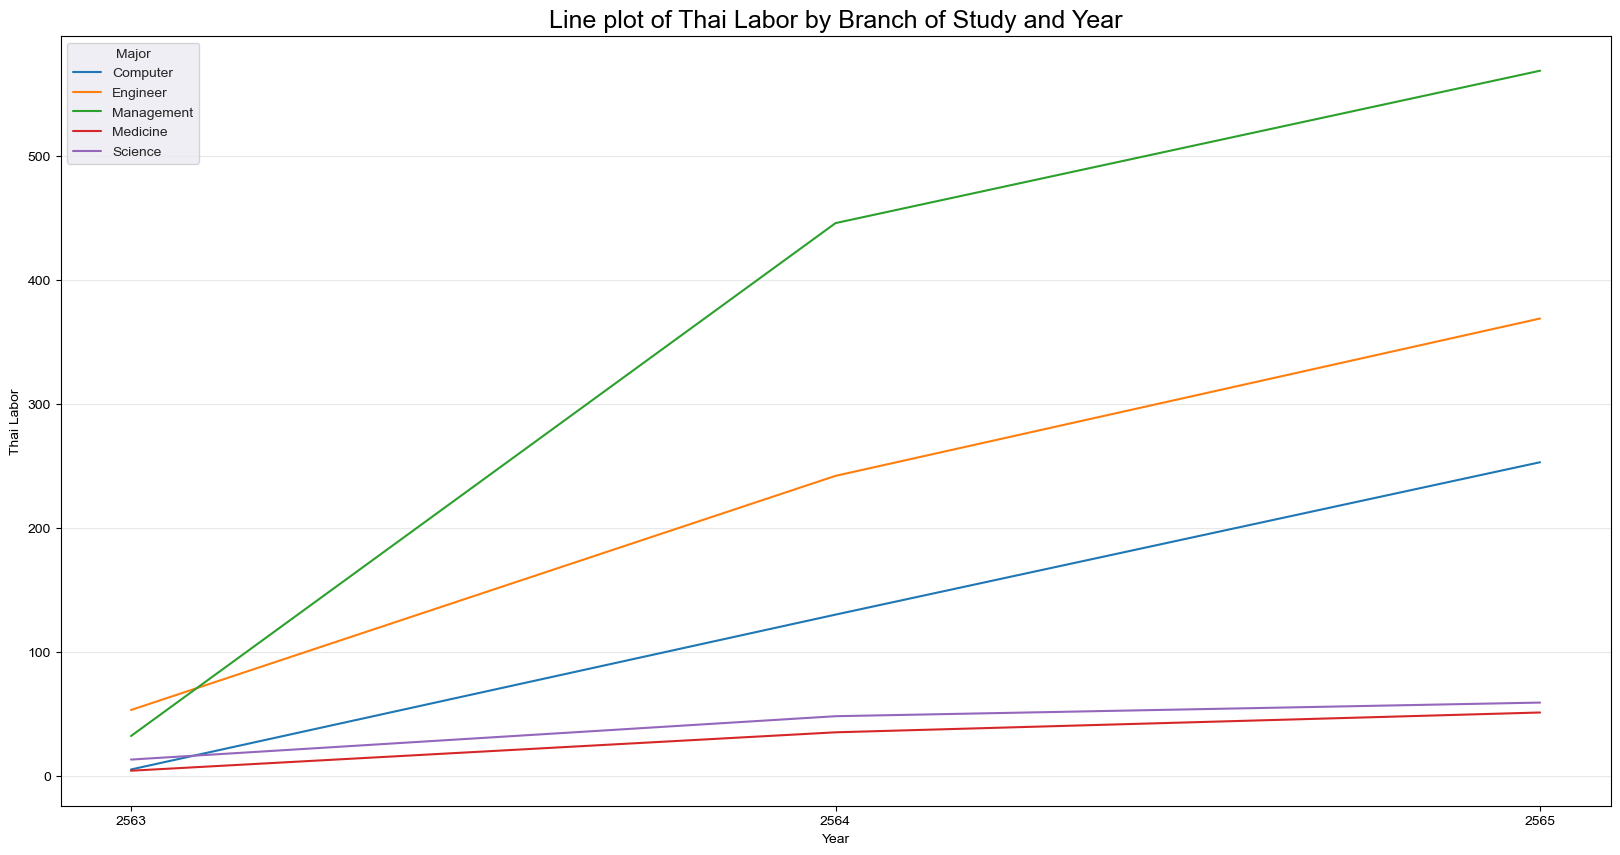

In [12]:
year_major_group = year_with_timestamp.groupby(['Year', 'Major'])['Thai'].sum().reset_index()

top_5_majors = year_major_group['Major'].value_counts().head(6).index.tolist()
top_5_data = year_major_group[(year_major_group['Major'].isin(top_5_majors)) & (year_major_group['Major'] != 'need_all')]

plt.figure(figsize=(20, 10))
plt.title('Line plot of Thai Labor by Branch of Study and Year', fontsize = 18)

sns.set_style("darkgrid")
sns.lineplot(x ='Year', y ='Thai', hue = 'Major', data = top_5_data)
plt.xticks(year_with_timestamp['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Thai Labor')
plt.grid(visible = True, axis = 'y')

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

plt.show()


# Growth
แสดงการเปลี่ยนแปลงของ demand ตั้งแต่ปี 2563-2565 (จำนวนเท่า)

In [13]:
year_major_group = year_with_timestamp.groupby(['Year', 'Major'])['Thai'].sum().reset_index()

year_major_group['percent_increase'] = round(year_major_group.groupby('Major')['Thai'].pct_change(), 1)

average_increase = year_major_group.groupby('Major')['percent_increase'].mean()

average_increase.sort_values(ascending= False).head(6)


Major
Computer        12.95
Architecture     7.00
Management       6.60
need_all         4.20
Medicine         4.15
Engineer         2.05
Name: percent_increase, dtype: float64

# Bar Chart 1
10 อันดับ demand ที่ต้องการในแรงงานไทย

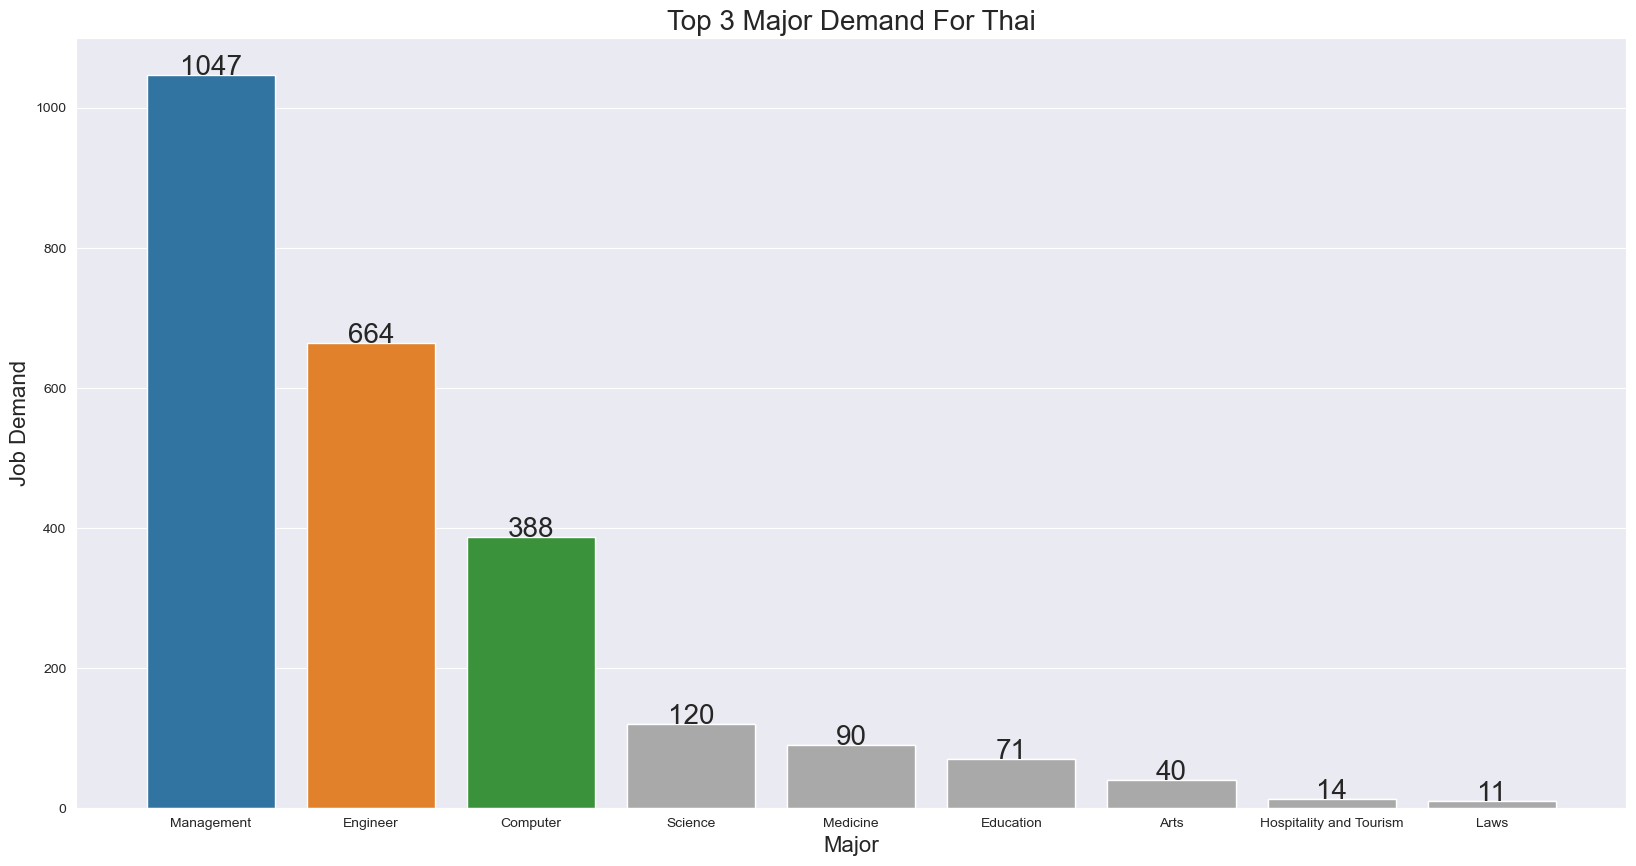

In [14]:
new_data_all_10 = all_new_data.head(10)
new_data_all_10 = new_data_all_10[new_data_all_10.Major != 'need_all']

plt.figure(figsize=(20, 10))
sns.barplot(x='Major', y='Thai', data=new_data_all_10)
for index, value in enumerate(new_data_all_10['Thai']):
    plt.text(index, value, str(value), fontsize=20, ha='center')
    if index > 2:
        plt.bar(index, value, color='darkgray')

plt.title("Top 3 Major Demand For Thai", fontsize = 20)
plt.xlabel("Major", fontsize = 16)
plt.ylabel("Job Demand", fontsize = 16)

plt.grid(visible = True, axis = 'y')

plt.show()

# Bar Chart 2
การเปรียบเทียบระหว่างผู้ชายและผู้หญิงในแต่ละสาขาวิชา

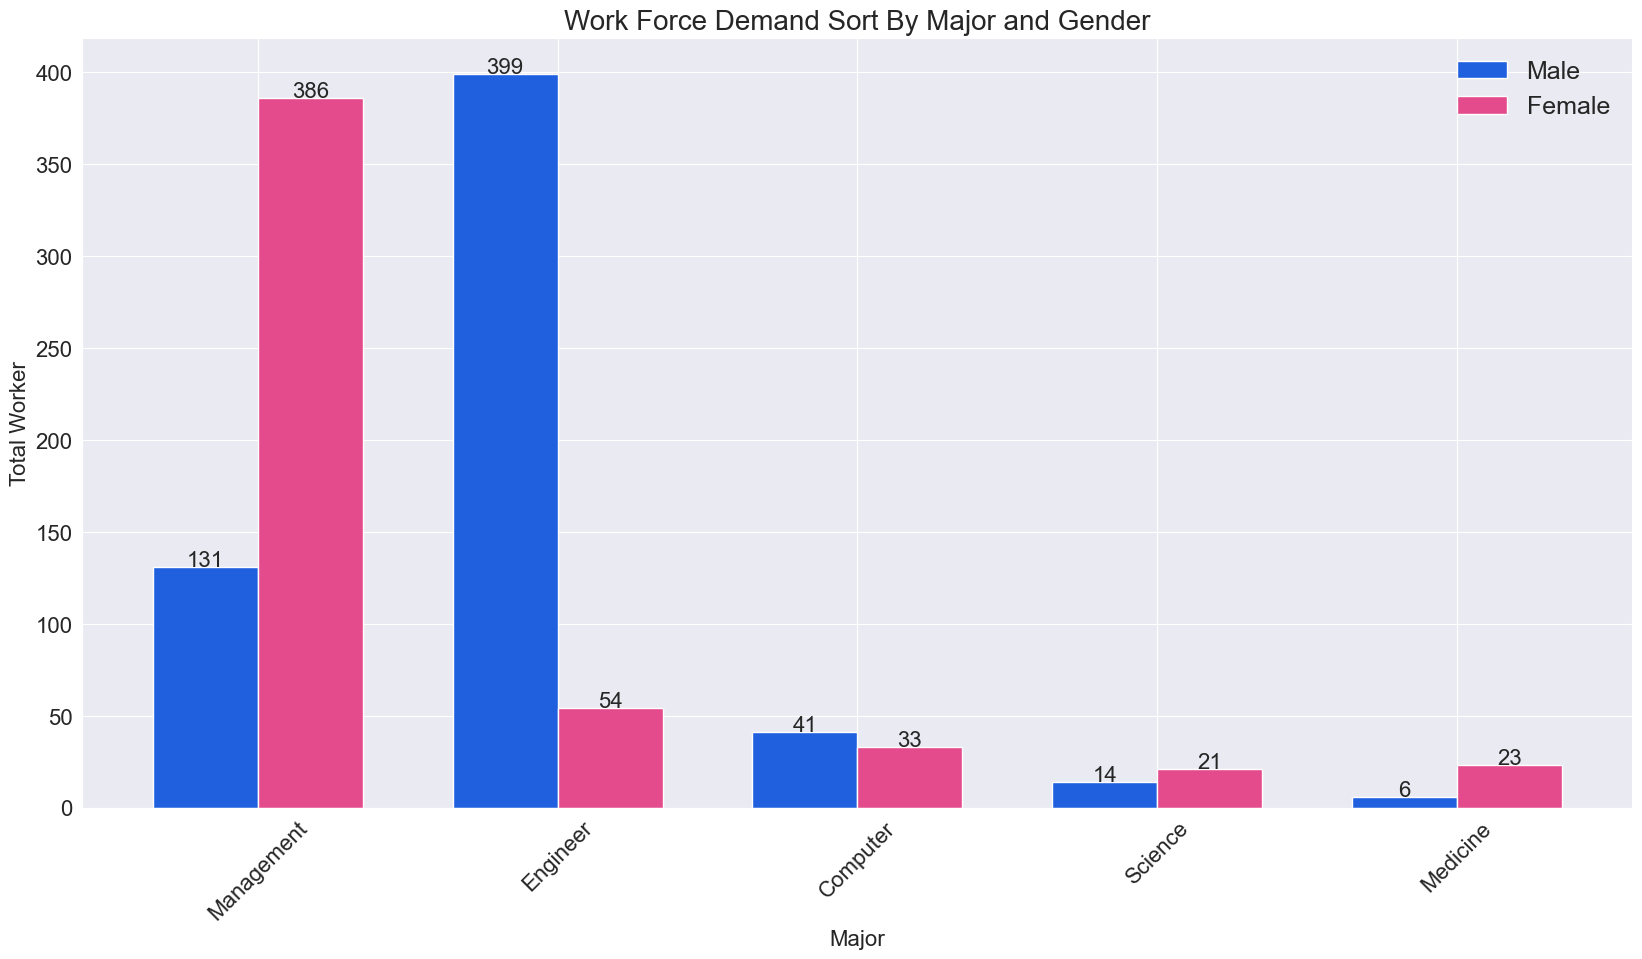

In [15]:
new_data_all = all_new_data.sort_values(by='Total_Work_Demand', ascending=False).head(6)
new_data_all = new_data_all[new_data_all.Major != 'need_all']
# new_data_all = new_data_all.head(5)

index = np.arange(len(new_data_all.index))
bar_width = 0.35

fig, ax = plt.subplots(figsize = (20,10))
male = ax.bar(index, new_data_all["Male"], bar_width, label="Male", color = "#2060df")
female = ax.bar(index + bar_width, new_data_all["Female"], bar_width, label="Female", color = "#e44b8d")

for i, v in enumerate(male):
    ax.text(i, v.get_height()+0.5, str(v.get_height()), fontsize = 16, ha='center')
for i, v in enumerate(female):
    ax.text(i  + bar_width, v.get_height()+0.5, str(v.get_height()), fontsize = 16, ha='center')

plt.title("Work Force Demand Sort By Major and Gender", fontsize=20)
plt.xticks(index + bar_width/2, new_data_all.Major, fontsize=16, rotation=45)
plt.xlabel("Major", fontsize=16)
plt.ylabel("Total Worker", fontsize=16)
plt.legend(loc='best', fontsize=18, frameon=False)

plt.yticks(fontsize=16)
plt.show()
